In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline

In [2]:
def formatFilename(filename):
    return filename.replace(".csv", "")

SystemError: <built-in method write of _io.BufferedWriter object at 0x00000170EA6A5A98> returned a result with an error set

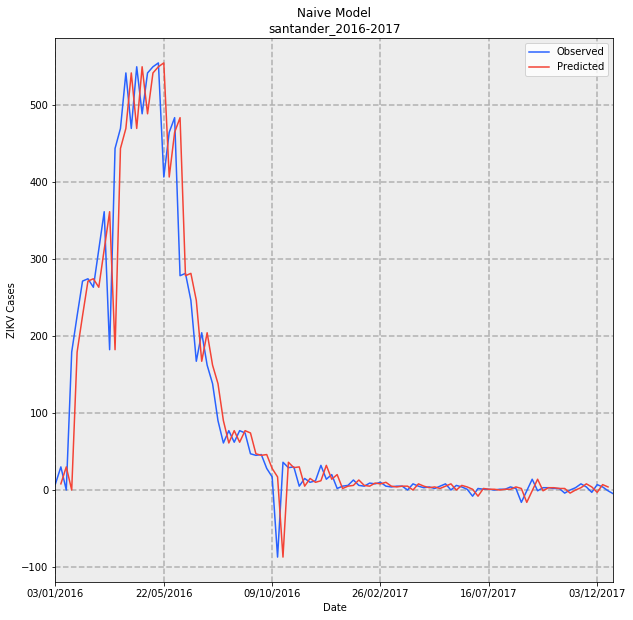

In [3]:
for country in ["Mexico", "Brazil", "Colombia"]:
    folder = "../../data/{}/processed_data".format(country)
    files = os.listdir(folder)
    for file in files:
        dataset = pd.read_csv("{}/{}".format(folder, file), index_col=0)
        dataset.rename(index=str, columns={"Cases": "Observed"}, inplace=True)
        dataset.drop("Searches", axis=1, inplace=True)
        dataset["Predicted"] = dataset["Observed"][:-1].shift(1)
        dataset["error"] = dataset["Predicted"] - dataset["Observed"]
        
        if(not os.path.isdir("{}/{}".format(country, file))):
            os.mkdir("{}/{}".format(country, file))
        
        formattedFilename = formatFilename(file)
        plt.clf()
        
        cols = ['Observed', 'Predicted']
        colors = ['#2962FF', '#F44336']
        
        dataset[cols].plot(
            figsize=(10, 10),
            grid=True,
            color=colors
        )
        ax = plt.gca()
        ax.set_facecolor((0.9, 0.9, 0.9, 0.7))
        plt.title("Naive Model\n{}".format(formattedFilename))
        plt.xlabel("Date")
        plt.ylabel("ZIKV Cases")
        plt.grid(linestyle='dashed', linewidth=1.5)
        fig = plt.gcf()
        fig.savefig("{}/{}/Naive-{}.png".format(country, file, formattedFilename))
        plt.close("all")

        dataset.to_csv("{}/{}/Naive-{}.csv".format(country, file, formattedFilename))